In [1]:
# setup
# first go to terminal, cd into assignment1-simple-image-search-NiGitaMyrGitrunning 
# run: bash setup.sh 
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# utility functions for this course
import sys
sys.path.append(os.path.join(".." ))
from utils.imutils import jimshow
from utils.imutils import jimshow_channel

try to set the bin count down --> might work better, since their might be 

In [4]:
os.getcwd()

'/Users/Nikita/Documents/GitHub/cds-viz/vis_ass-1_simple-image-search-NiGitaMyrGit/src'

In [3]:
# unzipping pictures
import zipfile

# specify the path of the zip file to extract
zip_file_path = os.path.join("..", "data", "flowers.zip")

# create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_obj:
    # extract all the contents of the zip file to a folder with the same name
    zip_obj.extractall(zip_file_path)


In [2]:
# Define particular image want to work with

target_path = os.path.join("..", "data", "flowers", "image_1305.jpg")
target_filename = cv2.imread(target_path)

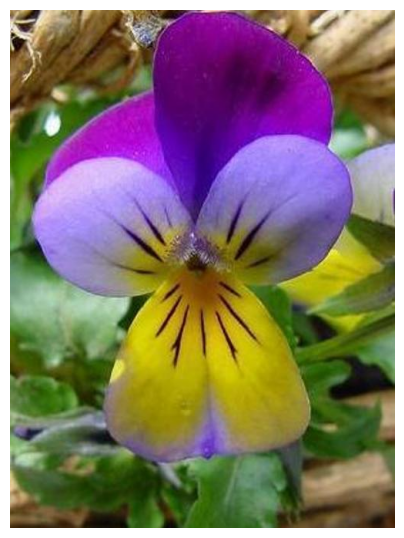

In [3]:
jimshow(target_filename)

In [ ]:
# Set the main directory 'flower_dir' where the files are located
flower_dir = os.path.join("assignment1-simple-image-search-NiGitaMyrGit", "data", "flowers")

# Set the target image
target_filename = os.path.join(flower_dir, "image_1305.jpg")
target_image = cv2.imread(target_filename)


# Calculate the histogram of the target image
target_hist = cv2.calcHist([target_image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

# Create a list to store the distances between the target histogram and each image histogram
distances = []

# Loop over every image in the flower_dir and calculate the histogram
for filename in os.listdir(flower_dir):
    # Check if the filename is the same as the target filename
    if filename == os.path.basename(target_filename):
        continue  # skip this image and continue with the next one
    # Read the image
    image = cv2.imread(os.path.join(flower_dir, filename))
    # Calculate the histogram of the image
    hist = cv2.calcHist([image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
    
    # Calculate the distance between the target histogram and the image histogram
    # using the Bhattacharyya distance
    # The Bhattacharyya distance is the 
    distance= cv2.compareHist(target_hist, hist, cv2.HISTCMP_BHATTACHARYYA)
    
    # Add the filename and distance to the distances list
    distances.append((filename, distance))

# Sort the distances list by distance in ascending order
distances.sort(key=lambda x: x[1])

# Create a list to store the top 5 images
top_5 = []

# Add the target image to the top 5 list with a distance of 0.0
top_5.append((os.path.basename(target_filename), 0.0))

In [9]:
def make_histogram(image):
    # Split channels
    channels = cv2.split(image)
    # Names of colours
    colors = ("b", "g", "r")
    # Create empty list to store histograms
    hist_list = []
    # For every tuple of channel, colour
    for (channel, color) in zip(channels, colors):
        # Create a histogram
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        # Normalize the histogram
        hist = cv2.normalize(hist, hist).flatten()
        # Add histogram to list
        hist_list.append(hist)
    # Concatenate the histograms into a single feature vector
    hist = np.concatenate(hist_list)


In [ ]:
# split channels
channels = cv2.split(image)
# names of colours
colors = ("b", "g", "r")
# for every tuple of channel, colour
for (channel, color) in zip(channels, colors):
    # Create a histogram
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])

In [10]:
#making a function that calculates the 3D numpy arrays of an image
def calc_image_hist(image):
    hist = cv2.calcHist([image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
    return hist

In [11]:
# Set the main directory 'flower_dir' where the files are located
flower_dir = os.path.join("..", "data", "flowers")

# Set the target image
target_filename = os.path.join(flower_dir, "image_1305.jpg")
target_image = cv2.imread(target_filename)

# Calculate the histogram of the target image
target_hist = make_histogram(target_image)


In [14]:
plt.show(target_image)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [8]:
# Comparing histogram of image to all other image histograms 
# using ```cv2.compareHist()``` function with the
# ```cv2.HISTCMP_CHISQR``` metric

# Create a list to store the distances between the target histogram and each image histogram
distances = []

# Loop over every image in the flower_dir and calculate the histogram
for filename in os.listdir(flower_dir):
    # Read the image
    image = cv2.imread(os.path.join(flower_dir, filename))
    
    # Calculate the histogram of the image
    hist = calc_image_hist(image)
    
    # Calculate the distance between the target histogram and the image histogram
    # using the Bhattacharyya distance
    # The Bhattacharyya distance is the 
    distance = cv2.compareHist(target_hist, hist, cv2.HISTCMP_BHATTACHARYYA)
    
    # Add the filename and distance to the distances list
    distances.append((filename, distance))



error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/histogram.cpp:2031: error: (-215:Assertion failed) H1.type() == H2.type() && H1.depth() == CV_32F in function 'compareHist'


In [ ]:
# Find the five images most similar to target image

In [ ]:
# Save a **CSV file** to the folder called ```out```

csv file showing **five most similar images** and **distance metric**:

|Filename|Distance]
|---|---|
|target|0.0|
|filename1|---|
|filename2|---|